# OT-based image alignment

In [44]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.stats import multivariate_normal
from scipy.io import loadmat 

from otimage import readers, imagerep, imagereg
from otimage.utils import plot_maxproj

In [46]:
# Select frames
t1 = 3
t2 = t1 + 1

# Load two successive frames from dataset
img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
with readers.ZimmerReader(img_path) as reader:
    frame_1 = reader.get_frame(t1)
    frame_2 = reader.get_frame(t2)
    img_shape = frame_1.shape

# Load MP components
n_mps = 50
mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mp_components/mp_0000_0050.mat'
mp_data = loadmat(mp_path)
cov = mp_data['cov']
pts_1 = mp_data['means'][t1, 0:n_mps, :]
pts_2 = mp_data['means'][t2, 0:n_mps, :]
wts_1 = mp_data['weights'][t1, 0:n_mps, 0]
wts_2 = mp_data['weights'][t2, 0:n_mps, 0]

In [47]:
alpha, beta, _ = imagereg.ot_reg_linear(pts_1, pts_2, wts_1, wts_2)

(-0.5, 889.5, -0.5, 649.5)

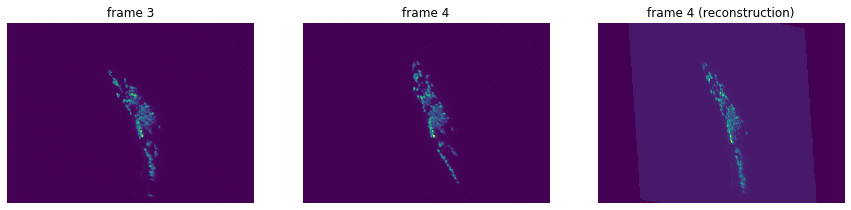

In [48]:
# Apply linear transform to first frame to reconstruct frame at time t
inv_beta = np.linalg.inv(beta)
inv_alpha = -inv_beta @ alpha
rec_img = affine_transform(frame_1, inv_beta, inv_alpha)

# MP reconstruction
#rec_pts_t = reg_data['rec_pts'][t, :, :].astype(int)
#rec_img_t = imagerep.reconstruct_image(rec_pts_t, [cov], wts_0, img_shape)

plt.figure(figsize=(15, 15))

plt.subplot(131)
plot_maxproj(frame_1)
plt.title(f'frame {t1}')
plt.axis('off')
        
plt.subplot(132)
plot_maxproj(frame_2)
plt.title(f'frame {t2}')
plt.axis('off')
        
plt.subplot(133)
plot_maxproj(rec_img)
plt.title(f'frame {t2} (reconstruction)');
plt.axis('off')